In [1]:
import matplotlib.pyplot as plt
import torch
import os
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "5,6,7"
# load meta-llama llama3.1 model using vllm:
MODEL_OPTIONS = {
    "qwen": {
        "name": "Qwen/Qwen2.5-7B",
        "dirname": "./qwen2.5",
        "trust_remote_code": True
    },
    "llama3-8b": {
        "name": "meta-llama/Meta-Llama-3-8B",
        "dirname": "./llama3.1",
        "trust_remote_code": False
    },
    "llama3-70b": {
        "name": "meta-llama/Meta-Llama-3-70B",
        "dirname": "./llama3.1-70b",
        "trust_remote_code": False
    },
    "olmo": {
        "name": "allenai/OLMo-7B-hf",
        "dirname": "./olmo",
        "trust_remote_code": True
    }
}

data_dict = torch.load("tracked_prob_all.pt")

/tmp/ipykernel_1490254/771029542.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data_dict = torch.load("tracked_prob_all.pt")


FileNotFoundError: [Errno 2] No such file or directory: 'tracked_prob_all.pt'

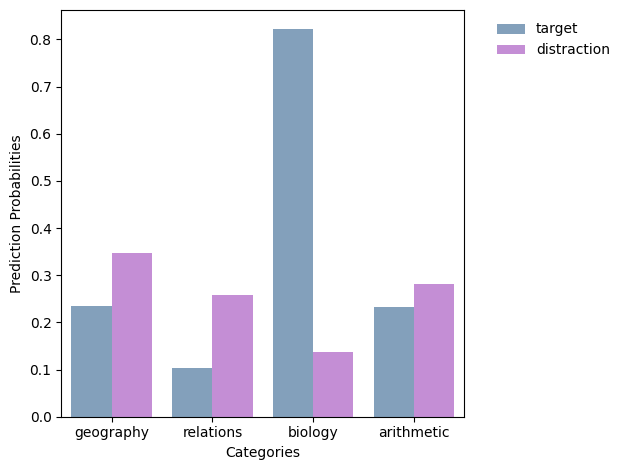

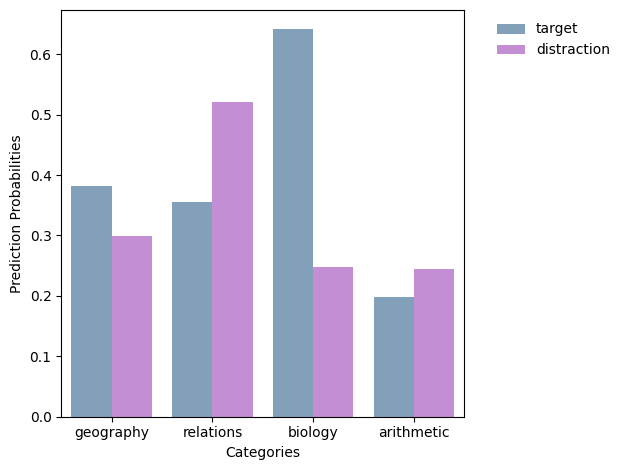

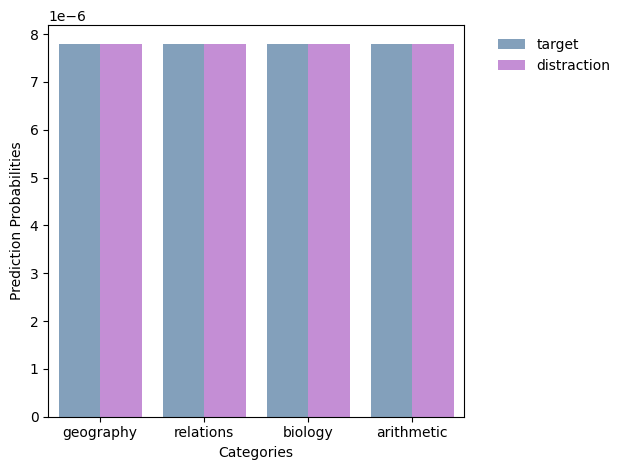

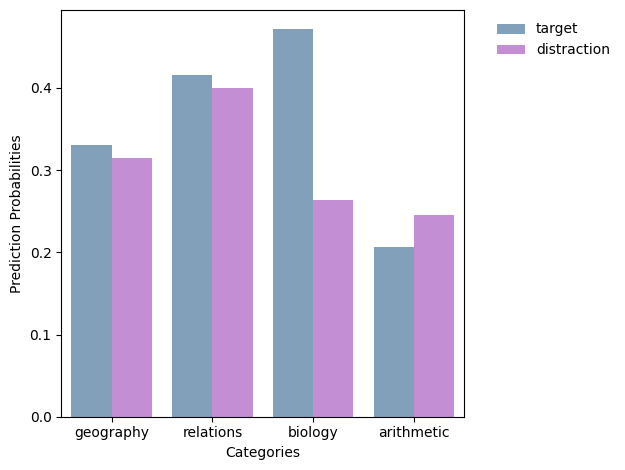

In [12]:
def plot_cat(prob_in_topic, dirname):
    # Set up the plot style
    import pandas as pd
    import seaborn as sns
    
    # Define the color palette
    cols = ["#7aa0c4", "#ca82e1", "#8bcd50", "#df9f53", "#64b9a1", "#745ea6", "#db7e76"]
    sns.set_palette(sns.color_palette(cols))
    
    probs_summary = {'category': [], 'target': [], 'distraction': []}
    # Create bars for each length in the data
    for i, (category, probs) in enumerate(prob_in_topic.items()):
        probs_summary['category'].append(category)
        probs_summary['target'].append(probs[2].item())
        probs_summary['distraction'].append(probs[5::3].mean().item())
    probs_summary_df = pd.DataFrame(probs_summary)
    
    # Create a figure and axis to properly manage the legend placement
    fig, ax = plt.subplots()
    
    # Melt the DataFrame for easier plotting with seaborn
    melted_df = probs_summary_df.melt(id_vars=['category'], value_vars=['target', 'distraction'])
    sns.barplot(data=melted_df, x='category', y='value', hue='variable', ax=ax, )
    
    # Move the legend outside the plot area
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='', frameon=False)
    ax.set_xlabel("Categories")
    ax.set_ylabel("Prediction Probabilities")
    fig.tight_layout()
    plt.savefig(os.path.join(dirname, f"{model_name}_cat_prob.pdf"), bbox_inches='tight')
for model_name in MODEL_OPTIONS.keys():
    plot_cat(data_dict[model_name]['2'], MODEL_OPTIONS[model_name]['dirname'])

In [13]:
acc_dict = {}
for model_name in MODEL_OPTIONS.keys():
    model_dir = MODEL_OPTIONS[model_name]['dirname']
    # Load origin_twohop_length.pt from the model directory
    try:
        acc_dict[model_name] = torch.load(os.path.join(model_dir, 'origin_twohop_length.pt'))
    except FileNotFoundError:
        print(f"Warning: origin_twohop_length.pt not found in {model_dir}")


/tmp/ipykernel_2330000/3484679359.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  acc_dict[model_name] = torch.load(os.path.join(model_dir, 'origin_twohop_length.pt'))


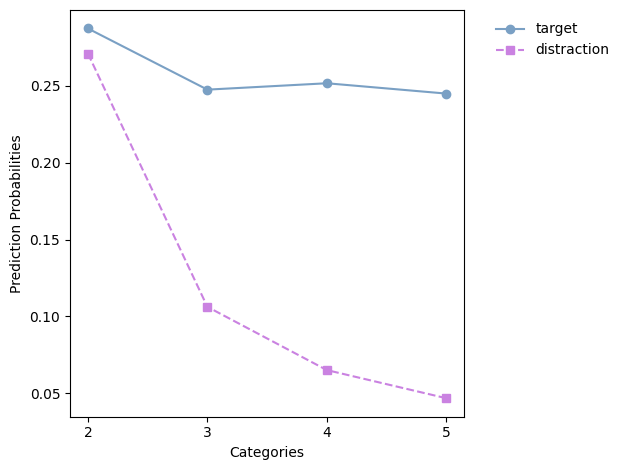

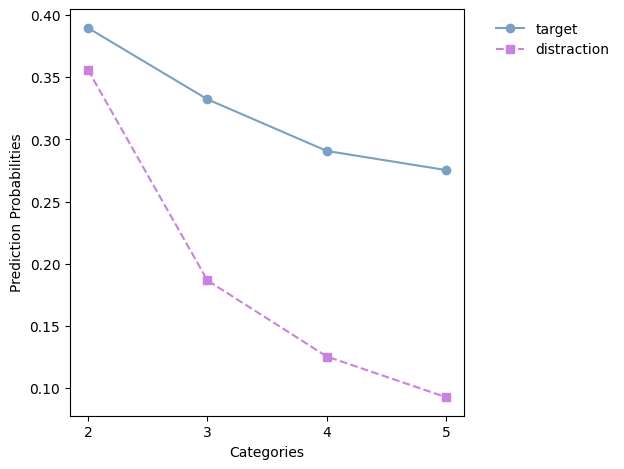

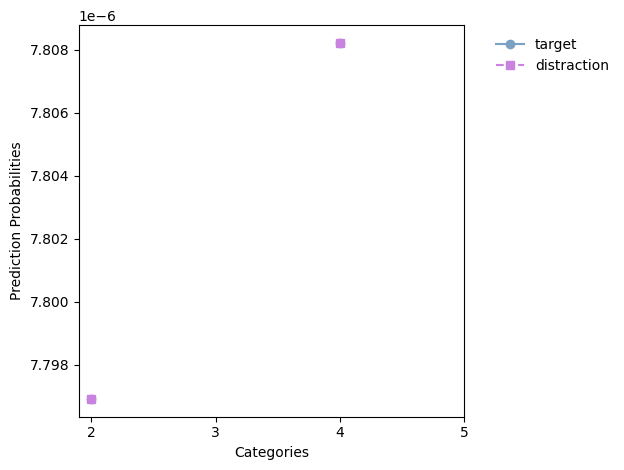

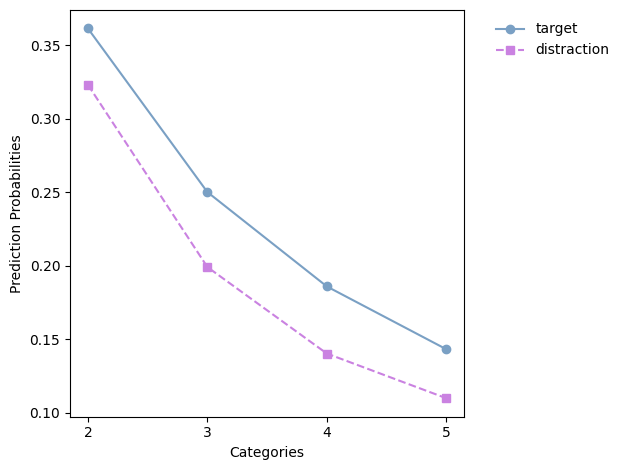

In [10]:
def plot_line(prob_in_k, dirname):
    # Set up the plot style
    import pandas as pd
    import seaborn as sns
    
    # Define the color palette
    cols = ["#7aa0c4", "#ca82e1", "#8bcd50", "#df9f53", "#64b9a1", "#745ea6", "#db7e76"]
    sns.set_palette(sns.color_palette(cols))
    
    probs_summary = {'distraction':[], 'value': [], 'group': []}
    # Create bars for each length in the data
    for i, (k, probs) in enumerate(prob_in_k.items()):
        probs_summary['distraction'].extend([int(k)]*2)
        probs_summary['value'].extend([probs[2].item(), probs[5::3].mean().item()])
        probs_summary['group'].extend(['target', 'distraction'])
    probs_summary_df = pd.DataFrame(probs_summary)
    
    # Create a figure and axis to properly manage the legend placement
    fig, ax = plt.subplots()
    
    # make line plots
    # sns.lineplot(data=probs_summary_df, x='distraction', y='value', hue='group', ax=ax)
    ax.plot(probs_summary_df['distraction'][::2], probs_summary_df['value'][::2], marker='o', linestyle='-', label='target', color=cols[0])
    ax.plot(probs_summary_df['distraction'][1::2], probs_summary_df['value'][1::2], marker='s', linestyle='--', label='distraction', color=cols[1])
    
    # Move the legend outside the plot area
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='', frameon=False)
    ax.set_xlabel("Categories")
    ax.set_ylabel("Prediction Probabilities")
    ax.set_xticks(range(2, 6))
    fig.tight_layout()
    plt.savefig(os.path.join(dirname, f"{model_name}_k_prob.pdf"), bbox_inches='tight')
for model_name in MODEL_OPTIONS.keys():
    plot_line(acc_dict[model_name], MODEL_OPTIONS[model_name]['dirname'])